In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats


In [16]:
np.random.seed(0)
sales_data = np.random.exponential(scale=1000, size=1000)  


In [17]:
df = pd.DataFrame(sales_data, columns=['sales'])

In [18]:
df.head()

,sales
0,795.874508
1,1255.930763
2,923.223146
3,787.201152
4,551.048491


In [5]:
df.describe()

,sales
count,1000.000000
mean,1003.540209
std,1029.608774
min,0.546114
25%,284.505079
50%,656.476060
75%,1336.591574
max,8561.030754


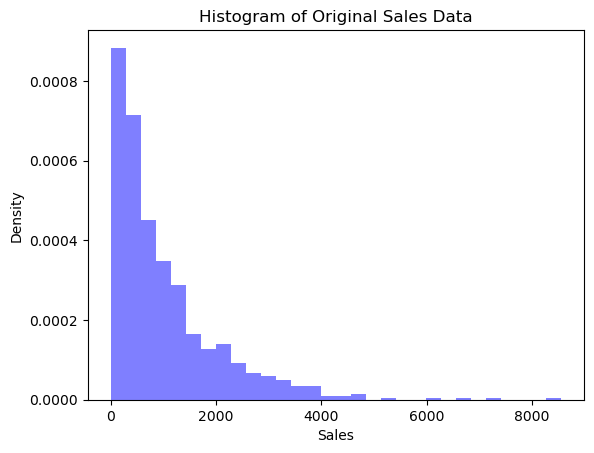

In [6]:
## Plot a histogram of the original sales data
plt.hist(df['sales'], bins=30, density=True, alpha=0.5, color='blue')
plt.title('Histogram of Original Sales Data')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.show()

In [7]:
# Apply the Box-Cox transformation to the sales data
df['sales'], lam = stats.boxcox(df['sales'])


In [ ]:
df.head(5)

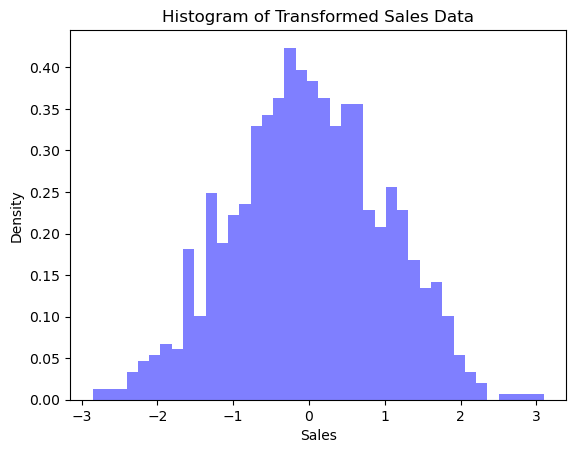

In [23]:
# Plot a histogram of the transformed sales data
plt.hist(df['sales'], bins=40, density=True, alpha=0.5, color='blue')
plt.title('Histogram of Transformed Sales Data')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler


In [12]:
scaler = StandardScaler()


In [13]:
df['sales'] = scaler.fit_transform(df[['sales']])


In [19]:
from sklearn.preprocessing import PowerTransformer


In [21]:
power_transformer = PowerTransformer(method='yeo-johnson')


In [22]:
df['sales'] = power_transformer.fit_transform(df[['sales']])


# Hypothesis Testing

In [24]:
import pandas as pd
import scipy.stats as stats


In [25]:
# Load the widget weights from the CSV file
df = pd.read_csv("weight-height.csv")


In [26]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [27]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [ ]:
df.info()

In [28]:
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [30]:
# Calculate the sample mean and standard deviation
sample_mean = df["Weight"].mean()
sample_std = df["Weight"].std()

In [31]:
sample_mean

161.44035683283076

In [32]:
sample_std

32.108439006519546

In [33]:
# Set the null hypothesis (H0): the average weight is 10 grams
null_hypothesis = 10

# Set the alternative hypothesis (Ha): the average weight is not equal to 10 grams
alternative_hypothesis = "two-sided"  

In [34]:
# Perform a one-sample t-test
z_statistic, p_value = stats.ttest_1samp(df["Weight"], null_hypothesis, alternative=alternative_hypothesis)

In [35]:
# Print the results
print("Sample mean: {:.2f} grams".format(sample_mean))
print("Sample standard deviation: {:.2f} grams".format(sample_std))
print("t-statistic: {:.2f}".format(t_statistic))
print("p-value: {:.2e}".format(p_value))

Sample mean: 161.44 grams
Sample standard deviation: 32.11 grams
t-statistic: 471.65
p-value: 0.00e+00


In [36]:
p_value >0.05

False

In [37]:
p_value <0.05

True

In [38]:
# Print the results
print("Sample mean: {:.2f} grams".format(sample_mean))
print("Sample standard deviation: {:.2f} grams".format(sample_std))
print("t-statistic: {:.2f}".format(t_statistic))
print("p-value: {:.2e}".format(p_value))

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is smaller than or equal to alpha
if p_value <= alpha:
    print("Reject the null hypothesis")
else:
    print("Accept the null hypothesis")

Sample mean: 161.44 grams
Sample standard deviation: 32.11 grams
t-statistic: 471.65
p-value: 0.00e+00
Reject the null hypothesis



# Z-Score 

In [39]:
# Create a sample dataset of player statistics
player_data2= pd.DataFrame({
    'Player': ['Player A', 'Player B'],
    'Points': [5, 10],
    'Rebounds': [10, 8],
    'Assists': [5, 10]
})

In [40]:
player_data2

,Player,Points,Rebounds,Assists
0,Player A,5,10,5
1,Player B,10,8,10


In [42]:
# Calculate the mean and standard deviation of the Points column
points_mean2 = player_data2['Points'].mean()
points_std2 = player_data2['Points'].std()

In [43]:
points_std2

3.5355339059327378

In [44]:
points_mean2

7.5

In [45]:
# Calculate the z-score for each player's Points
player_data2['Points z-score'] = (player_data2['Points'] - points_mean2) / points_std2

In [46]:
# Print the player data with z-scores
player_data2

,Player,Points,Rebounds,Assists,Points z-score
0,Player A,5,10,5,-0.707107
1,Player B,10,8,10,0.707107



# A/B Testing 

In [47]:
import numpy as np
from scipy import stats

In [66]:
group_a = np.array([10, 12, 15, 14, 11, 9, 13, 16, 18, 17])
group_b = np.array([8, 9, 7, 10, 12, 11, 9, 8, 10, 11])

In [67]:
group_a

array([10, 12, 15, 14, 11,  9, 13, 16, 18, 17])

In [68]:
group_b

array([ 8,  9,  7, 10, 12, 11,  9,  8, 10, 11])

In [69]:
group_a.mean()

13.5

In [70]:
group_b.mean()

9.5

In [71]:
null_hypothesis = "old_design is  better than new_design"
alternative_hypothesis = "old_design is not better than new_design"

In [73]:
z_statistic,p_value = stats.ttest_1samp(group_a - group_b,0, alternative='greater')

In [65]:
z_statistic

3.493335058437492

In [64]:
p_value

0.0033971960424628244

In [55]:
alpha = 0.05

In [56]:
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("not reject the null hypothesis")

Reject the null hypothesis


In [ ]:
# Print the test results
print("Null Hypothesis----->", null_hypothesis)
print("Alternative Hypothesis---->:", alternative_hypothesis)
print("Z-Statistic---->", z_statistic)
print("P-Value---->:", p_value)

# Interval Estimation 

In [74]:
import numpy as np
import scipy.stats as stats

# Generate a hypothetical dataset (sample data)
np.random.seed(42)  
sample_data = np.random.normal(loc=50, scale=10, size=100)  # Mean=50, Standard Deviation=10, Sample Size or n=100


In [75]:
sample_data

array([54.96714153, 48.61735699, 56.47688538, 65.23029856, 47.65846625,
       47.65863043, 65.79212816, 57.67434729, 45.30525614, 55.42560044,
       45.36582307, 45.34270246, 52.41962272, 30.86719755, 32.75082167,
       44.37712471, 39.8716888 , 53.14247333, 40.91975924, 35.87696299,
       64.65648769, 47.742237  , 50.67528205, 35.75251814, 44.55617275,
       51.1092259 , 38.49006423, 53.75698018, 43.9936131 , 47.0830625 ,
       43.98293388, 68.52278185, 49.86502775, 39.42289071, 58.22544912,
       37.7915635 , 52.08863595, 30.40329876, 36.71813951, 51.96861236,
       57.3846658 , 51.71368281, 48.84351718, 46.98896304, 35.2147801 ,
       42.80155792, 45.39361229, 60.57122226, 53.4361829 , 32.36959845,
       53.24083969, 46.1491772 , 43.23078   , 56.11676289, 60.30999522,
       59.31280119, 41.60782477, 46.90787624, 53.31263431, 59.75545127,
       45.20825762, 48.14341023, 38.93665026, 38.03793376, 58.12525822,
       63.56240029, 49.27989878, 60.03532898, 53.61636025, 43.54

In [76]:
pd.DataFrame(sample_data)

,0
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466
...,...
95,35.364851
96,52.961203
97,52.610553
98,50.051135


In [77]:

# Calculate the sample mean and standard error of the mean (SEM)
sample_mean = np.mean(sample_data)
sample_size = len(sample_data)
sem = stats.sem(sample_data)



In [78]:
sample_mean

48.96153482605907

In [79]:
sample_size

100

In [80]:
sem

0.9081684280078008

In [82]:
# Set the confidence level (e.g., 95% confidence interval)
confidence_level = 0.95


In [83]:
# Calculate the margin of error
margin_of_error = sem * stats.t.ppf((1 + confidence_level) / 2, sample_size - 1)

In [84]:
margin_of_error

1.8020031896780713

In [85]:
# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)


In [86]:
confidence_interval

(47.159531636381004, 50.76353801573714)

In [89]:
# Print the results
print("Sample mean: {:.2f}".format(sample_mean))
print("Sample size: {}".format(sample_size))
print("Standard Error of the Mean (SEM): {:.2f}".format(sem))
print("Confidence Level: {:.2f}".format(confidence_level))
print("Margin of Error: {:.2f}".format(margin_of_error))
print("Confidence Interval: ({:.2f}, {:.2f})".format(confidence_interval[0], confidence_interval[1]))


Sample mean: 48.96
Sample size: 100
Standard Error of the Mean (SEM): 0.91
Confidence Level: 0.95
Margin of Error: 1.80
Confidence Interval: (47.16, 50.76)


In [92]:
print("confidence_leve:",confidence_level)

confidence_leve: 0.95
